Implement Ordinary Least Squares

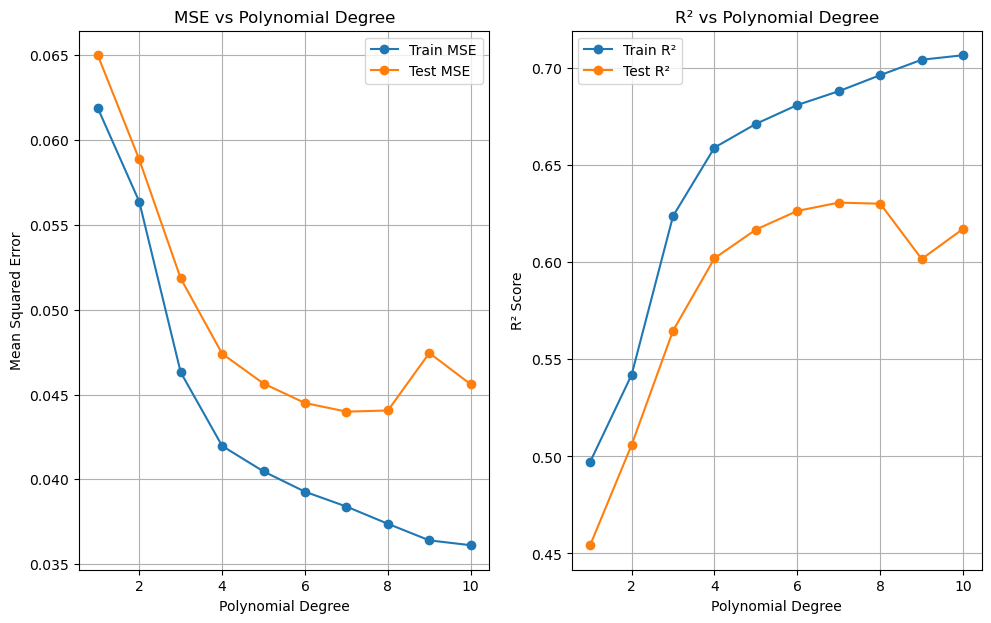

In [1]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Ensures that the random numbers created are the same every time. 
np.random.seed(1)

#Create data
x = np.arange(0, 1, 0.03)
y = np.arange(0, 1, 0.03)
x, y = np.meshgrid(x, y)

#Define the Franke function, given in the assignment. 
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
    term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4.0 - 0.25 * ((9 * y - 3) ** 2))
    term4 = -0.2 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4

#Generate the dataset, with added noise. The noise has a mean of 0, and a standard deviation of 0.2. 
z = FrankeFunction(x, y) + np.random.normal(0, 0.2, x.shape)

#Coverts the 2D arrays created in the meshgrid to 1D vectors. 
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

#Splits the data into training and test sets, where the test set consists of 20% of the data. Using tthe train_test_split from scikit-learn. 
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split( x_flat, y_flat, z_flat, test_size=0.2, random_state=1)

#The test sets are combined to 2D arrays. 
xy_train = np.vstack((x_train, y_train)).T
xy_test = np.vstack((x_test, y_test)).T

#Scales the data using StandardScaler from Scikit-learn. 
scaler = StandardScaler()

#The fit-function means that the data is scaled based on the training data. 
xy_train_scaled = scaler.fit_transform(xy_train)
xy_test_scaled = scaler.transform(xy_test)


#Defines the order of the polynomial feature, in this case the 10th degree. 
degrees = np.arange(1,11)

#Define functions for calculating mean squared error. This code is from the lecture notes week 35.
def MSE(y_data, y_model):   
    n = np.size(y_model)
    return np.sum((y_data - y_model)**2)/n

#Defines a function for calculating R2-score. This code is from the lecture notes week 35.
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model)**2) / np.sum((y_data - np.mean(y_data))**2)  #Lecture notes week 35

#Creates empty lists to store MSE, R2-scores and values for the coefficients in. 
mse_train_values = []
mse_test_values = []
r2_train_values = []
r2_test_values = []
coefficitents = []

#For-loop to calculate MSE and R2-score based on the polynomial degree. 
#This code is deriveted from lecture notes week 35. 
for deg in degrees:
    #Fits the function to polynomial to the features.
    poly = PolynomialFeatures(degree=deg)
    X_train = poly.fit_transform(xy_train_scaled)
    X_test = poly.transform(xy_test_scaled)

    #Generate the coefficients using matrix inversion, assumes that X.T@X is invertible
    OLSbeta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train

    #Calculates the predictions
    z_train_pred = X_train @ OLSbeta
    z_test_pred = X_test @ OLSbeta

    #Calculate MSE and R2-score for both training and test data
    mse_train = MSE(z_train, z_train_pred)
    mse_test = MSE(z_test, z_test_pred)
    r2_train = R2(z_train, z_train_pred)
    r2_test = R2(z_test, z_test_pred)

    #Store the results
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    r2_train_values.append(r2_train)
    r2_test_values.append(r2_test)
    coefficitents.append(OLSbeta)


#Plotting MSE, R² and the coefficients
plt.figure(figsize=(18, 7))

#MSE Plot
plt.subplot(1, 3, 1)
plt.plot(degrees, mse_train_values, label='Train MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.grid(True)
plt.legend()
plt.show

#R² Plot
plt.subplot(1, 3, 2)
plt.plot(degrees, r2_train_values, label='Train R²', marker='o')
plt.plot(degrees, r2_test_values, label='Test R²', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

Implementing ridge and lasso regression

c:\Users\Frida\anaconda3\envs\project_1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.656e+00, tolerance: 2.775e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Frida\anaconda3\envs\project_1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.062e+00, tolerance: 2.775e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Frida\anaconda3\envs\project_1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

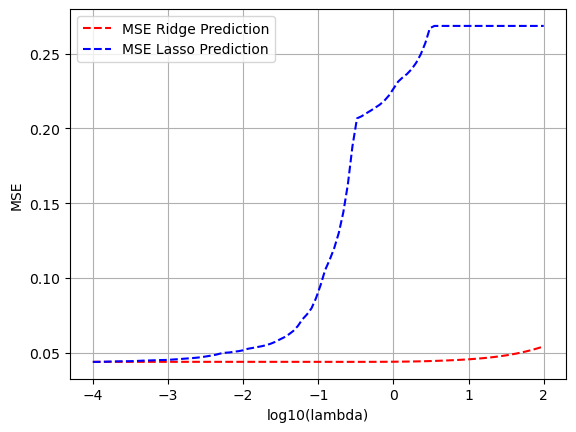

In [4]:
#Import the necessary libraries, only includes new libraries
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#Ensures that the random numbers created are the same every time. 
np.random.seed(1)

#Create data
x = np.arange(0, 1, 0.03)
y = np.arange(0, 1, 0.03)
x, y = np.meshgrid(x, y)

#Define the Franke function, given in the assignment. 
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
    term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4.0 - 0.25 * ((9 * y - 3) ** 2))
    term4 = -0.2 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4

#Generate the dataset, with added noise. The noise has a mean of 0, and a standard deviation of 0.2. 
z = FrankeFunction(x, y) + np.random.normal(0, 0.2, x.shape)

#Coverts the 2D arrays created in the meshgrid to 1D vectors. 
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

#Splits the data into training and test sets, where the test set consists of 20% of the data. Using tthe train_test_split from scikit-learn. 
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split( x_flat, y_flat, z_flat, test_size=0.2, random_state=1)

#The test sets are combined to 2D arrays. 
xy_train = np.vstack((x_train, y_train)).T
xy_test = np.vstack((x_test, y_test)).T

#Scales the data using StandardScaler from Scikit-learn. 
scaler = StandardScaler()

#The fit-function means that the data is scaled based on the training data. 
xy_train_scaled = scaler.fit_transform(xy_train)
xy_test_scaled = scaler.transform(xy_test)

#Fit to 8th degree polynominal
poly = PolynomialFeatures(degree=8)
X_train = poly.fit_transform(xy_train_scaled)
X_test = poly.transform(xy_test_scaled)

#Defines a functions for calculating mean squared error. This code is from the lecture notes week 35.
def MSE(y_data, y_model):  
    n = np.size(y_model)
    return np.sum((y_data - y_model)**2)/n

#Setting the number of lambdas and values for lambda. 
nlambdas = 100
lambdas = np.logspace(-4, 2, nlambdas)
#Creating an identity matrix the same shape as X_train. 
I = np.eye(X_train.shape[1])

#Creates vectors with zeros to store the values in. 
MSEPredict_Ridge = np.zeros(nlambdas)
MSETrain_Ridge = np.zeros(nlambdas)
MSEPred_Lasso = np.zeros(nlambdas)

#For-loop to implement ridge and lasso regression. This part is from the lecture Notes 4.10 and lecture nores week 36. 
for i in range(nlambdas): 
    #
    lmb = lambdas[i]
    RidgeBeta = np.linalg.inv(X_train.T @ X_train+lmb*I) @ X_train.T @ z_train

    z_tilde_ridge = X_train @ RidgeBeta
    z_test_pred_ridge = X_test @ RidgeBeta

    MSEPredict_Ridge[i] = MSE(z_test, z_test_pred_ridge)
    MSETrain_Ridge[i] = MSE(z_train, z_tilde_ridge)

    #Implements lasso regression using the lasso functoin som scikit-learn. 
    RegLasso = linear_model.Lasso(lmb, fit_intercept = False, max_iter=10000)
    RegLasso.fit(X_train,z_train)
    z_test_pred_lasso = RegLasso.predict(X_test)
    MSEPred_Lasso[i] = MSE(z_test, z_test_pred_lasso)
    
#Plots a figure to show the results. 
plt.figure()
plt.plot(np.log10(lambdas), MSEPredict_Ridge, 'r--', label = 'MSE Ridge Prediction')
plt.plot(np.log10(lambdas), MSEPred_Lasso, 'b--', label = 'MSE Lasso Prediction')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


Bias-variance trade-off

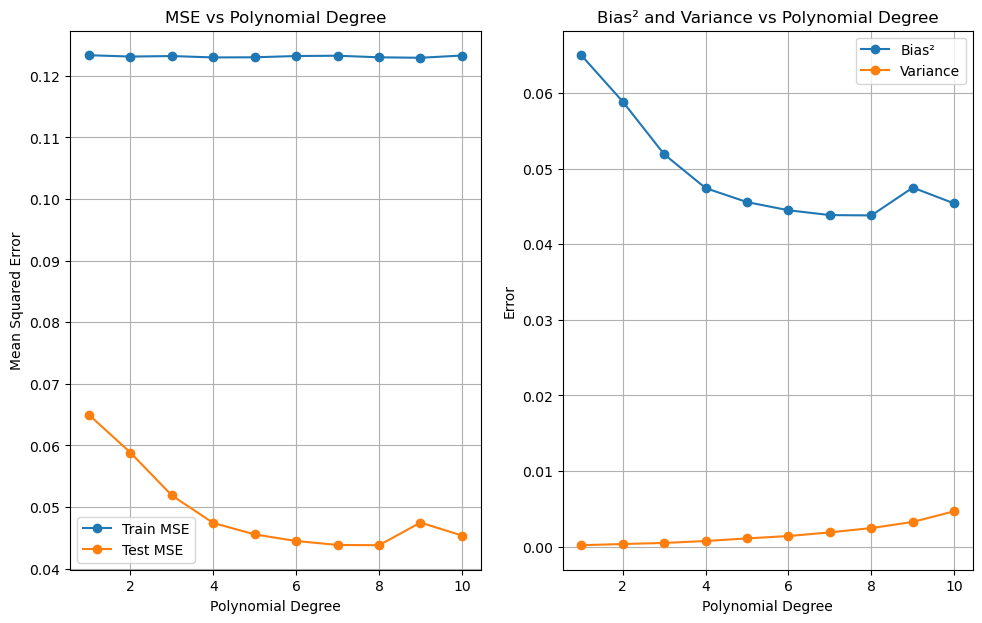

In [5]:
#Import the necessary libraries
from sklearn.utils import resample
#Ensures that the random numbers created are the same every time. 
np.random.seed(1)

#Create data
x = np.arange(0, 1, 0.03)
y = np.arange(0, 1, 0.03)
x, y = np.meshgrid(x, y)

#Define the Franke function, given in the assignment. 
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
    term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4.0 - 0.25 * ((9 * y - 3) ** 2))
    term4 = -0.2 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4

#Generate the dataset, with added noise. The noise has a mean of 0, and a standard deviation of 0.2. 
z = FrankeFunction(x, y) + np.random.normal(0, 0.2, x.shape)

#Coverts the 2D arrays created in the meshgrid to 1D vectors. 
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

#Splits the data into training and test sets, where the test set consists of 20% of the data. Using tthe train_test_split from scikit-learn. 
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split( x_flat, y_flat, z_flat, test_size=0.2, random_state=1)

#The test sets are combined to 2D arrays. 
xy_train = np.vstack((x_train, y_train)).T
xy_test = np.vstack((x_test, y_test)).T

#Scales the data using StandardScaler from Scikit-learn. 
scaler = StandardScaler()

#The fit-function means that the data is scaled based on the training data. 
xy_train_scaled = scaler.fit_transform(xy_train)
xy_test_scaled = scaler.transform(xy_test)

#Defines a functions for calculating mean squared error. This code is from the lecture notes week 35.
def MSE(y_data, y_model):  
    n = np.size(y_model)
    return np.sum((y_data - y_model)**2)/n

#Bootstrap parameters.
n_bootstrap = 1000  
#Polynominal degree.
degrees = np.arange(1,11)

#Empty lists to store values.
mse_train_values = []
mse_test_values = []
bias_values = []
variance_values = []


#Calculate MSE, Bias and Variance. This part is derivited from lecture notes 5.4. 
for degree in degrees:
    #Creates empty lists to store values. 
    z_pred_train_bootstrap = np.empty((len(z_train), n_bootstrap))
    z_pred_test_bootstrap = np.empty((len(z_test), n_bootstrap))

    for i in range(n_bootstrap):
        
        xy_bootstrap, z_bootstrap = resample(xy_train_scaled, z_train)

        #Fit polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_boot = poly.fit_transform(xy_bootstrap)
   
        #Generate the coefficients using matrix inversion
        OLSbeta = np.linalg.inv(X_boot.T @ X_boot) @ X_boot.T @ z_bootstrap

        #Stores the predictions. 
        z_pred_train_bootstrap[:, i] = X_boot @ OLSbeta 
        z_pred_test_bootstrap[:, i] = poly.transform(xy_test_scaled) @ OLSbeta 

    #Calculates the mean of test and train predictions for every degree. 
    z_pred_train_mean = np.mean(z_pred_train_bootstrap, axis=1)
    z_pred_test_mean = np.mean(z_pred_test_bootstrap, axis=1)

    #Calculate the MSE for both test and train. 
    mse_train = MSE(z_train, z_pred_train_mean)
    mse_test = MSE(z_test, z_pred_test_mean)

    #Calculate the bias and variance. 
    bias = np.mean((z_test - z_pred_test_mean)**2)
    variance = np.mean(np.var(z_pred_test_bootstrap, axis=1))

    #Stores the values. 
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    bias_values.append(bias)
    variance_values.append(variance)


#Plotts figure for MSE and R²
plt.figure(figsize=(18, 7))

#MSE
plt.subplot(1, 3, 1)
plt.plot(degrees, mse_train_values, label='Train MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show

#R²
plt.subplot(1, 3, 2)
plt.plot(degrees, bias_values, label='Bias²', marker='o')
plt.plot(degrees, variance_values, label='Variance', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Bias² and Variance vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#Ensures that the random numbers created are the same every time. 
np.random.seed(1)

#Create data
x = np.arange(0, 1, 0.03)
y = np.arange(0, 1, 0.03)
x, y = np.meshgrid(x, y)

#Define the Franke function, given in the assignment. 
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
    term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4.0 - 0.25 * ((9 * y - 3) ** 2))
    term4 = -0.2 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4

#Generate the dataset, with added noise. The noise has a mean of 0, and a standard deviation of 0.2. 
z = FrankeFunction(x, y) + np.random.normal(0, 0.2, x.shape)

#Coverts the 2D arrays created in the meshgrid to 1D vectors. 
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

#Splits the data into training and test sets, where the test set consists of 20% of the data. Using tthe train_test_split from scikit-learn. 
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split( x_flat, y_flat, z_flat, test_size=0.2, random_state=1)

#The test sets are combined to 2D arrays. 
xy_train = np.vstack((x_train, y_train)).T
xy_test = np.vstack((x_test, y_test)).T

#Scales the data using StandardScaler from Scikit-learn. 
scaler = StandardScaler()

#The fit-function means that the data is scaled based on the training data. 
xy_train_scaled = scaler.fit_transform(xy_train)
xy_test_scaled = scaler.transform(xy_test)

#Defines a functions for calculating mean squared error. This code is from the lecture notes week 35.
def MSE(y_data, y_model):  
    n = np.size(y_model)
    return np.sum((y_data - y_model)**2)/n

#Setts the degree for the polynomial
deg=8 

#Fits to the polynomial
poly = PolynomialFeatures(degree=deg)
X_train_poly = poly.fit_transform(xy_train_scaled)
X_test_poly = poly.transform(xy_test_scaled)

#Uses Kfold cross-validation from scikit-learn. 
k = 10
kfold = KFold(n_splits=k)

#Setts the number of lambdas and size
nlambdas = 100
lambdas = np.logspace(-4, 2, nlambdas)

#Empy arrays to store values
MSE_Ridge = np.zeros(nlambdas)
MSE_Lasso = np.zeros(nlambdas)
MSE_ols = []

#Ridge and Lasso with cross-validation
for i, lmb in enumerate(lambdas):
    ridge = Ridge(alpha=lmb)
    lasso = Lasso(alpha=lmb, max_iter=20000, tol=0.1)
    
    ridge_mse_fold = []
    lasso_mse_fold = []
    ols_mse_fold = []

    for train_inds, test_inds in kfold.split(X_train_poly):
        X_train_fold, X_test_fold = X_train_poly[train_inds], X_train_poly[test_inds]
        z_train_fold, z_test_fold = z_train[train_inds], z_train[test_inds]
    
        #Ridge regression
        I = np.eye(X_train_fold.shape[1])  #Identity matrix
        #Calculating the beta
        RidgeBeta = np.linalg.inv(X_train_fold.T @ X_train_fold + lmb * I) @ X_train_fold.T @ z_train_fold
        #Making predictions and storing them
        z_pred_ridge = X_test_fold @ RidgeBeta
        ridge_mse_fold.append(MSE(z_test_fold, z_pred_ridge))

        #Lasso regression from scikit-learn
        lasso.fit(X_train_fold, z_train_fold)
        z_pred_lasso = lasso.predict(X_test_fold)
        lasso_mse_fold.append(MSE(z_test_fold, z_pred_lasso))
    
    MSE_Ridge[i] = np.mean(ridge_mse_fold)
    MSE_Lasso[i] = np.mean(lasso_mse_fold)

#Since OLS is not dependent on lambda these calculations are outside the other for-loop. 
ols_mse_fold = []
for train_inds, test_inds in kfold.split(X_train_poly):
    X_train_fold, X_test_fold = X_train_poly[train_inds], X_train_poly[test_inds]
    z_train_fold, z_test_fold = z_train[train_inds], z_train[test_inds]
    
    OLSbeta = np.linalg.inv(X_train_fold.T @ X_train_fold) @ X_train_fold.T @ z_train_fold
    z_pred_ols = X_test_fold @ OLSbeta
    ols_mse_fold.append(MSE(z_test_fold, z_pred_ols))

#Storing the mean MSE for the folds
MSE_ols = np.mean(ols_mse_fold)

# Print summary of MSE values
print(f'MSE OLS from K-fold cross validation: {MSE_ols:.4f}')
print(f'Mean MSE Ridge: {np.mean(MSE_Ridge):.4f} ± {np.std(MSE_Ridge):.4f}')
print(f'Mean MSE Lasso: {np.mean(MSE_Lasso):.4f} ± {np.std(MSE_Lasso):.4f}')

# Plot MSE for Ridge, Lasso, and OLS
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lambdas), MSE_Ridge, 'r--', label='Ridge MSE')
plt.plot(np.log10(lambdas), MSE_Lasso, 'b--', label='Lasso MSE')
plt.axhline(y=MSE_ols, color='orange', label=f'OLS MSE = {MSE_ols:.4f}')
plt.xlabel('log10(lambda)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('MSE for Ridge, Lasso, and OLS')
plt.grid(True)
plt.show()
